In [10]:
### IMPORT LIBRARIES ###

# IMPORT SCIENTIFIC LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget
%matplotlib inline
import pandas as pd
import seaborn as sns

# IMPORT CUSTOM LIBRARIES
from libraries.IN8_read_data import read_IN8scan, gen_data_df
from functions import *

In [11]:
### IMPORT Boral Attenuation (Sasha) DATA ###
flux_folder = 'data/BoralAttenuator_data/'

folders = {'Cu': 'mono Cu/', 'Si111': 'mono Si111/', 'PG': 'mono PG/', 'Si311': 'mono Si311/'}

files = {'Cu': {0: '035069', 1: '035081', 2: '035085'},
         'Si111': {0: '035071', 1: '035082', 2: '035097'},
         'PG': {0: '035068', 1: '035080', 2: '035084'},
         'Si311': {0: '035072', 1: '035083'}
        }

data = {'Cu':{}, 'Si111':{}, 'PG':{}, 'Si311':{}}
for key in files.keys():
    for i in files[key].keys():
        data[key][i] = read_IN8scan(folders[key]+files[key][i], flux_folder)
        data[key][i]['data']['lambdaI'] = 2*np.pi/data[key][i]['data'].KI
        data[key][i]['data']['EI'] = 81.8/data[key][i]['data'].lambdaI**2
        data[key][i]['data']['I_M1'] = data[key][i]['data'].M1/data[key][i]['data'].TIME
        data[key][i]['data']['I_M2'] = data[key][i]['data'].M2/data[key][i]['data'].TIME
        data[key][i]['data']['I_CNTS'] = data[key][i]['data'].CNTS/data[key][i]['data'].TIME
        data[key][i]['data']['dI_M1'] = np.sqrt(data[key][i]['data'].M1)/data[key][i]['data'].TIME
        data[key][i]['data']['dI_M2'] = np.sqrt(data[key][i]['data'].M2)/data[key][i]['data'].TIME
        data[key][i]['data']['dI_CNTS'] = np.sqrt(data[key][i]['data'].CNTS)/data[key][i]['data'].TIME

# Attenation measurements (Boral)
Here follow the notes on the tablet. The quantity of interest is mainly M1, but we also have M2 and CNTS. **For now we focuse on the first!** **Note that we are concerned with the measurement time, therefore we are assuming that the reactor is stable!** These are the data:

In [12]:
data['Cu'][1]['data'].head()

,KI,M1,M2,TIME,CNTS,A1,A2,A4,A6,TM,...,DAC,dCNTS,lambdaI,EI,I_M1,I_M2,I_CNTS,dI_M1,dI_M2,dI_CNTS
PNT,,,,,,,,,,,,,,,,,,,,,
1,2.5601,20000,952,524.18,101886,42.77,85.52,-40.0,0.0,20.52,...,-1.98,319.195865,2.454273,13.580239,38.154832,1.816170,194.372162,0.269795,0.058862,0.608943
2,2.6001,20000,922,498.26,100970,41.95,83.90,-40.0,0.0,20.52,...,-1.98,317.757769,2.416517,14.007921,40.139686,1.850440,202.645205,0.283830,0.060941,0.637735
3,2.6401,20000,979,509.65,104662,41.17,82.35,-40.0,0.0,20.52,...,-1.98,323.515069,2.379904,14.442232,39.242617,1.920926,205.360542,0.277487,0.061393,0.634779
4,2.6802,20000,953,561.43,102534,40.43,80.86,-40.0,0.0,20.52,...,-1.98,320.209307,2.344297,14.884285,35.623319,1.697451,182.630070,0.251895,0.054986,0.570346
5,2.7202,20000,959,503.13,105653,39.71,79.43,-40.0,0.0,20.52,...,-1.98,325.043074,2.309825,15.331874,39.751158,1.906068,209.991454,0.281083,0.061550,0.646042


The measurements are taken using the first harmonic of the crystal, fulfilling the brag law $\lambda = 2d\sin\theta$.

Text(0, 0.5, 'A2 [deg]')

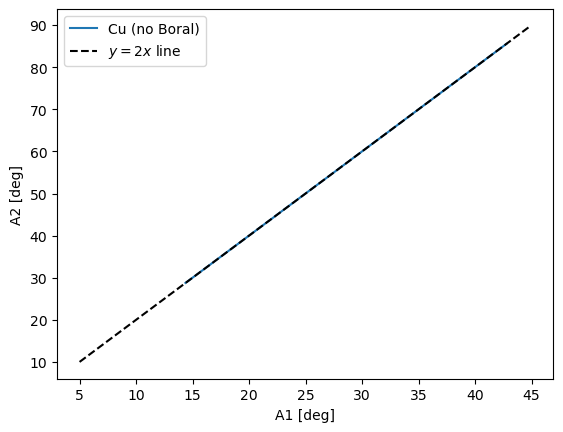

In [13]:
plt.plot(data['Cu'][0]['data'].A1, data['Cu'][0]['data'].A2, label='Cu (no Boral)')

X = np.arange(5, 45, 0.1)
plt.plot(X, 2*X, 'k--', label=r'$y=2x$ line')

plt.legend()
plt.xlabel('A1 [deg]')
plt.ylabel('A2 [deg]')

**For each monocrhomator we have a scan in energy for three different configurations: without attenuators, with 1 Boral plate and with 2 Boral plates.**

Boral feature a neutron cross section with a $1/v$ behaviour, i.e. we can write
$$
\sigma(v) = \sigma_o\frac{v_o}{v} \hspace{1cm} \sigma_o = \sigma(v_o)
$$
As we are not interested in the neutron speed, than we have:
$$
\sigma = \sigma_o \frac{E_o}{E} = \sigma_o \frac{\lambda}{\lambda_o}
$$

Then the trasmission can be derived from the Bears law:
$$
\mu = n \sigma \implies \mu = \mu_o \frac{\lambda}{\lambda_o} = \mu_o \sqrt{\frac{E_o}{E}}
$$
$$
T = e^{-\mu d} = e^{-\mu_o d \sqrt{\frac{E_o}{E}}}= e^{-\mu_o d \frac{\lambda}{\lambda_o}}
$$

Therefore, plotting the $I_o/I_{Boral}$ ($I_o$ is the intensity without attenuators, $I_{Boral}$ is the intensity with attenuators) we should obtain a straight line with slope $-\mu_o d$ in ylog scale. This is both true for the measured intensity at the monitor M1, M2 and CNTS, and the "true" intensity after the Boral plate as the efficiencies and Debye-Waller factors of the different detectors cancel out. **This is true up to when we are dealing with just one wavelenght in the system!**

###########################################
Lim Cu:  1.4 A,  41.73469387755102 meV 4.487989505128276 A-1
###########################################


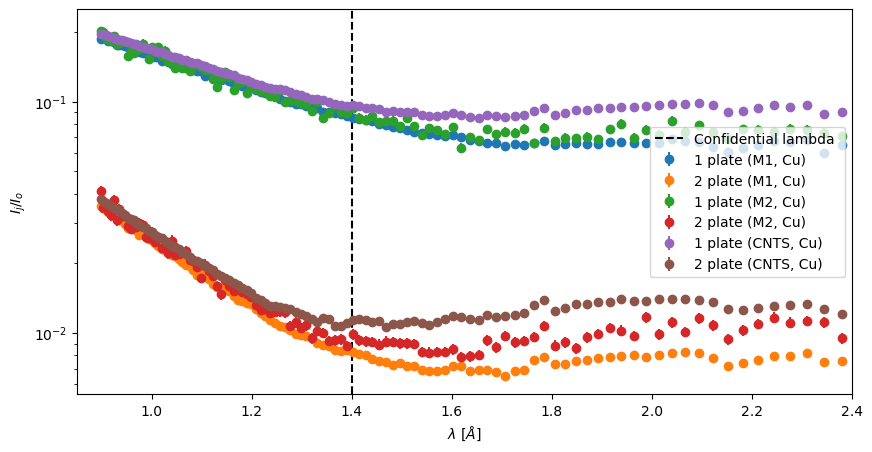

In [21]:
d0 = data['Cu'][0]['data']
d1 = data['Cu'][1]['data']
d2 = data['Cu'][2]['data']

plt.figure(figsize=(10,5))
plt.errorbar(d0.lambdaI, d1.I_M1/d0.I_M1, yerr=d1.I_M1/d0.I_M1*np.sqrt((d1.dI_M1/d1.I_M1)**2+(d0.dI_M1/d0.I_M1)**2), fmt='o', label='1 plate (M1, Cu)')
plt.errorbar(d0.lambdaI, d2.I_M1/d0.I_M1, yerr=d2.I_M1/d0.I_M1*np.sqrt((d2.dI_M1/d2.I_M1)**2+(d0.dI_M1/d0.I_M1)**2), fmt='o', label='2 plate (M1, Cu)')
plt.errorbar(d0.lambdaI, d1.I_M2/d0.I_M2, yerr=d1.I_M2/d0.I_M2*np.sqrt((d1.dI_M2/d1.I_M2)**2+(d0.dI_M2/d0.I_M2)**2), fmt='o', label='1 plate (M2, Cu)')
plt.errorbar(d0.lambdaI, d2.I_M2/d0.I_M2, yerr=d2.I_M2/d0.I_M2*np.sqrt((d2.dI_M2/d2.I_M2)**2+(d0.dI_M2/d0.I_M2)**2), fmt='o', label='2 plate (M2, Cu)')
plt.errorbar(d0.lambdaI, d1.I_CNTS/d0.I_CNTS, yerr=d1.I_CNTS/d0.I_CNTS*np.sqrt((d1.dI_CNTS/d1.I_CNTS)**2+(d0.dI_CNTS/d0.I_CNTS)**2), fmt='o', label='1 plate (CNTS, Cu)')
plt.errorbar(d0.lambdaI, d2.I_CNTS/d0.I_CNTS, yerr=d2.I_CNTS/d0.I_CNTS*np.sqrt((d2.dI_CNTS/d2.I_CNTS)**2+(d0.dI_CNTS/d0.I_CNTS)**2), fmt='o', label='2 plate (CNTS, Cu)')


lLim_Cu = 1.4
plt.axvline(lLim_Cu, color='k', linestyle='--', label='Confidential lambda ')

plt.xlabel(r'$\lambda$ [$\AA$]')
plt.ylabel(r'$I_j/I_o$')
plt.legend()
plt.xlim(.85,2.4)

plt.yscale('log')


print('###########################################')
print('Lim Cu: ', lLim_Cu, 'A, ', l2E(lLim_Cu), 'meV', l2k(lLim_Cu), 'A-1')
print('###########################################')

